In [14]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [2]:
results = pd.read_csv('test-log.csv')

In [3]:
results

,prune_v0,prune_v1,prune_v2,prune_v3,prune_v4,prune_v5,prune_v6,prune_v7,prune_v8,prune_v9,prune_v10,prune_v11,mean_class_acc
0,0.28,0.22,0.34,0.50,0.70,0.04,0.12,0.44,0.28,0.34,0.22,0.26,0.881212
1,0.48,0.62,0.48,0.90,0.44,0.50,0.18,0.62,0.68,0.40,0.88,0.74,0.813939
2,0.46,0.34,0.16,0.58,0.74,0.58,0.60,0.28,0.16,0.28,0.70,0.72,0.852424
3,0.24,0.24,0.24,0.80,0.94,0.48,0.30,0.56,0.64,0.98,0.70,0.60,0.833636
4,0.66,0.12,0.28,0.34,0.20,0.82,0.76,0.60,0.74,0.34,0.08,0.94,0.823636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55660,0.28,0.16,0.78,0.18,0.54,0.38,0.78,0.70,0.80,0.86,0.34,0.74,0.866667
55661,0.74,0.28,0.12,0.60,0.24,0.96,0.68,0.56,0.90,0.58,0.24,0.60,0.832424
55662,1.00,0.12,0.68,0.00,0.56,0.46,0.74,0.88,0.92,0.86,0.86,0.20,0.155152
55663,0.32,0.74,0.38,0.52,0.22,0.32,0.02,0.20,0.62,0.16,0.80,0.44,0.870303


In [4]:
for view in range(0, 12):
    print(f"View {view} mean: {results[f'prune_v{view}'].mean()}")

View 0 mean: 0.4982153956705291
View 1 mean: 0.5003880355699272
View 2 mean: 0.49990838049043385
View 3 mean: 0.5001907841552142
View 4 mean: 0.5021927602622832
View 5 mean: 0.5013272253660289
View 6 mean: 0.500166711578191
View 7 mean: 0.5007038534087846
View 8 mean: 0.49934968112817746
View 9 mean: 0.49889481721009615
View 10 mean: 0.5014982484505525
View 11 mean: 0.5014227970897331


In [5]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

In [6]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(55665, 12), (55665,)], [(41748, 12), (41748,)], [(13917, 12), (13917,)])

In [7]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [8]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

R2 Score: 0.9655616235038904
MSE: 0.0025321195990726207
Accuracy: 96.56%


In [12]:
importance = model.feature_importances_
for i in range(len(importance)):
    print(f"Feature {i}: {importance[i]:.3f}")

Feature 0: 0.078
Feature 1: 0.102
Feature 2: 0.081
Feature 3: 0.073
Feature 4: 0.077
Feature 5: 0.086
Feature 6: 0.095
Feature 7: 0.091
Feature 8: 0.078
Feature 9: 0.085
Feature 10: 0.070
Feature 11: 0.083


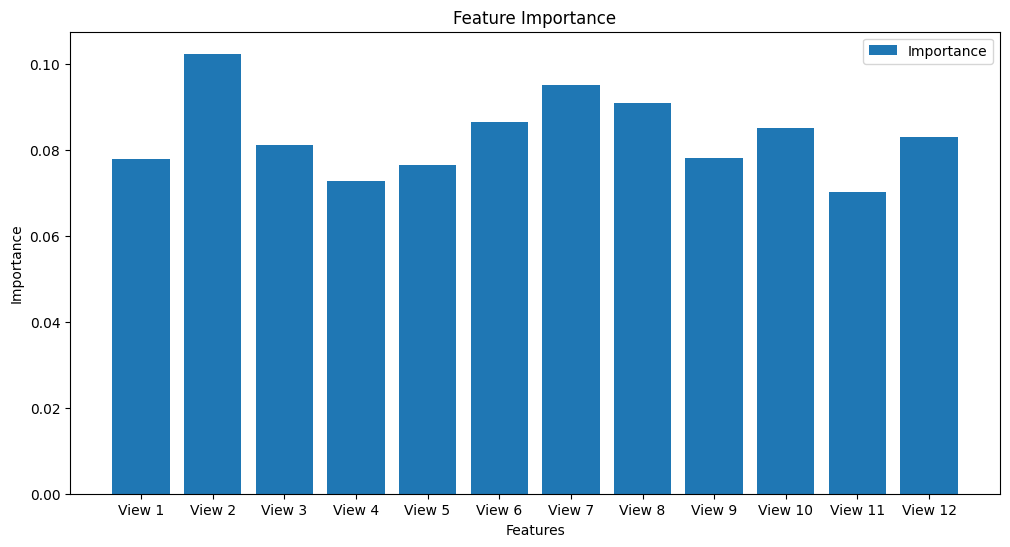

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [17]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)